## Будникова Валерия Павловна М8О-407Б-19
## Лабораторная работа 3

In [1]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import pickle
import pandas as pd
import os
import math
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GridSearchCV
import pickle
from IPython.display import display
import sdv


Вспомогательные функции:

In [2]:
def Plot_box(data, names, target):
    plt.figure(figsize=(30, 20))
    l = len(names)
    a = l // 2 + 1
    b = (l // a + 1) * 2
    a, b = b, a
    ind = 1
    for n in range(l):
        plt.subplot(a, b, ind)
        sns.boxplot(x = data[target] , y = data[names[n]])
        ind += 1
    
    plt.show()

def Plot_hist(data, names):
    colors = sns.color_palette("hls", len(names))
    plt.figure(figsize=(30, 10))
    plt.rc('legend', fontsize=10)  
    plt.rc('font', size=10)
    l = len(names)
    a = l // 2 + 1
    b = l // a + 1
    a, b = b, a
    for i in range(l):
        x = plt.subplot(a, b, i + 1)
        val = data[names[i]]
        x.hist(val, color=colors[i], label=names[i]);
        x.legend()

from sklearn import metrics
def plot_ConfusionMatrix(y_true, y_pred, title = ""):
    c_matr = metrics.confusion_matrix(y_true, y_pred) 
    disp = metrics.ConfusionMatrixDisplay(c_matr)
    fig, ax = plt.subplots(figsize=(10,10));
    disp.plot(ax=ax);
    disp.ax_.set_title("ConfusionMatrix " + title);

### Анализ и подготовка данных

In [120]:
file_path = "diabetes.csv"

data = pd.read_csv(file_path, parse_dates=True)

names = [col for col in data.columns]
data = data.drop(columns=[names[0]])
names = names[1:]
colors = sns.color_palette("hls", len(names))

print(" len data: {}".format(len(data)))
print(" len data_without_miss: {}".format(len(data.dropna())))

print("Data shape: ", data.shape)
data.head()


 len data: 768
 len data_without_miss: 768
Data shape:  (768, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


При анализе матрицы корреляций сильно зависящих друг от друга данных обнаружено не было.

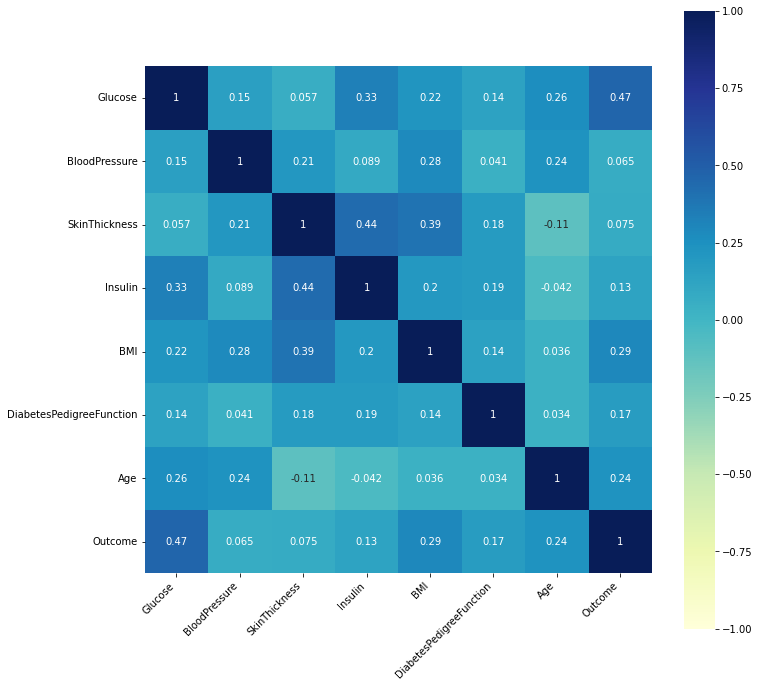

In [122]:
corr1 = data.corr()
plt.figure(figsize=(25, 25))
x1 = plt.subplot(2, 2, 1)
x1 = sns.heatmap(corr1, annot = True, vmin=-1, cmap="YlGnBu", vmax=1, square=True)
x1.set_xticklabels(x1.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

In [123]:
names = [col for col in data.columns]

Посмотрим на гистограмму данных

<AxesSubplot: ylabel='Frequency'>

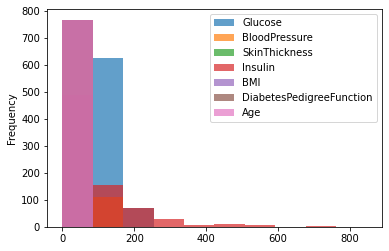

In [124]:
display(data[names[:-1]].plot.hist(alpha=0.7))

Нормализируем данные и посмотрим на результат

In [125]:
display(data.describe())
normalized_data=(data[names[:-1]] - data[names[:-1]].mean())/data[names[:-1]].std()
normalized_data[names[-1]] = data[names[-1]]
display(normalized_data.describe())

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-1.156482e-17,1.272131e-17,3.816392e-17,-4.972874e-17,2.659909e-16,2.451743e-16,2.035409e-16,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476951
min,-3.781190e+00,-3.570271e+00,-1.287373e+00,-6.924393e-01,-4.057829e+00,-1.188778e+00,-1.040871e+00,0.000000
25%,-6.847901e-01,-3.670975e-01,-1.287373e+00,-6.924393e-01,-5.951906e-01,-6.885198e-01,-7.857741e-01,0.000000
50%,-1.218083e-01,1.495433e-01,1.544326e-01,-4.277835e-01,9.413653e-04,-2.999328e-01,-3.606124e-01,0.000000
75%,6.053764e-01,5.628560e-01,7.186174e-01,4.117396e-01,5.843897e-01,4.659233e-01,6.597757e-01,1.000000
max,2.442886e+00,2.732747e+00,4.918660e+00,6.648507e+00,4.452906e+00,5.879733e+00,4.061069e+00,1.000000


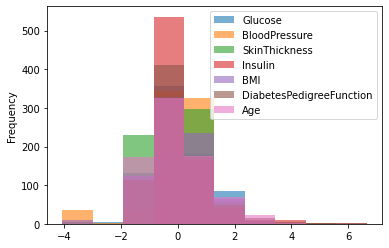

In [126]:
data_1 = normalized_data
data_1[names[:-1]].plot.hist(alpha=0.6);

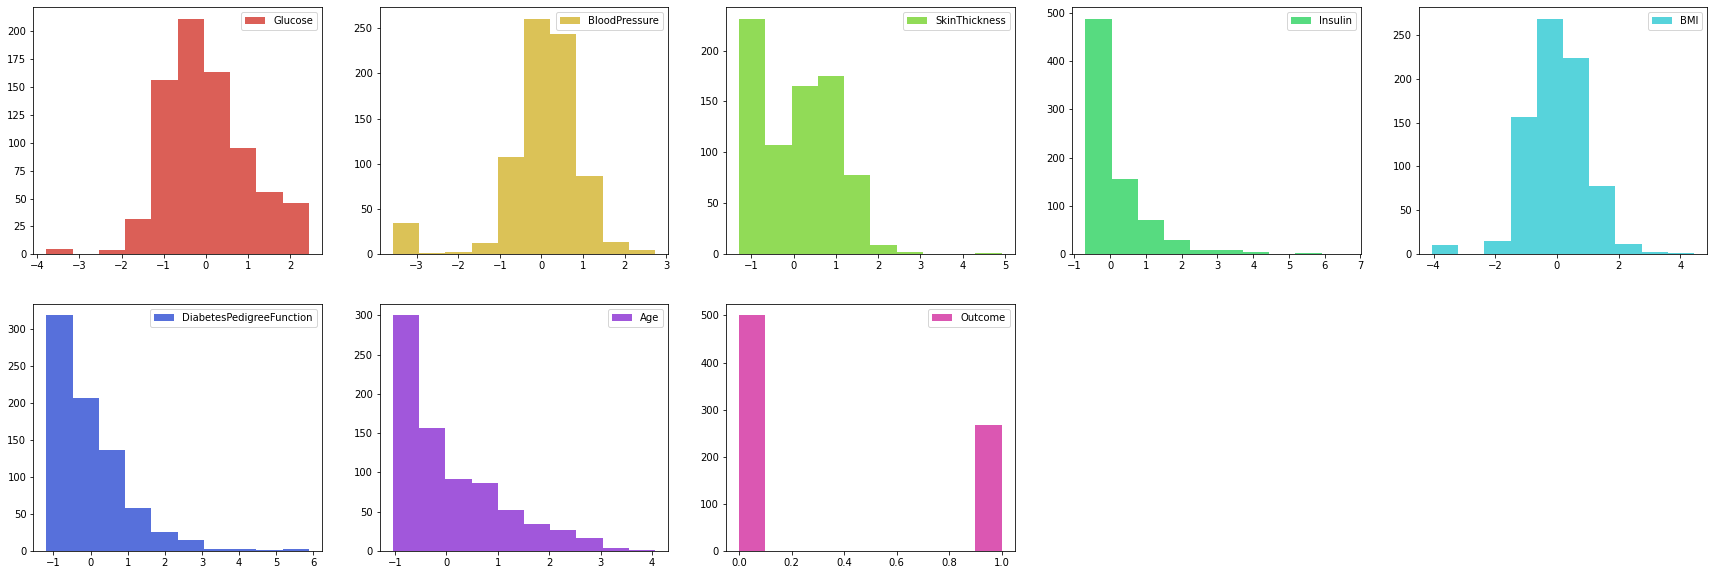

In [127]:
Plot_hist(data_1, names)

Посмотрим на выбросы:

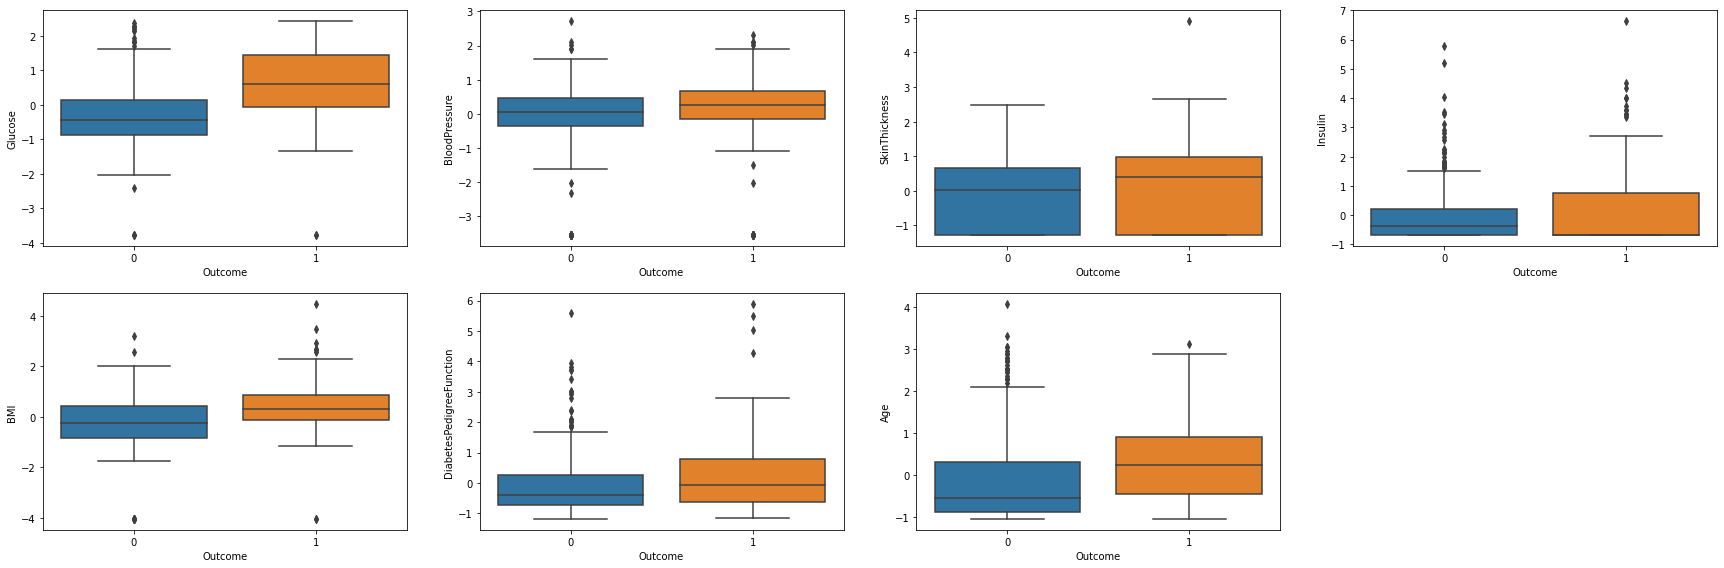

In [128]:
Plot_box(data_1, names[:-1], 'Outcome')

Удалим выбросы

Outcome
0    457
1    231
dtype: int64


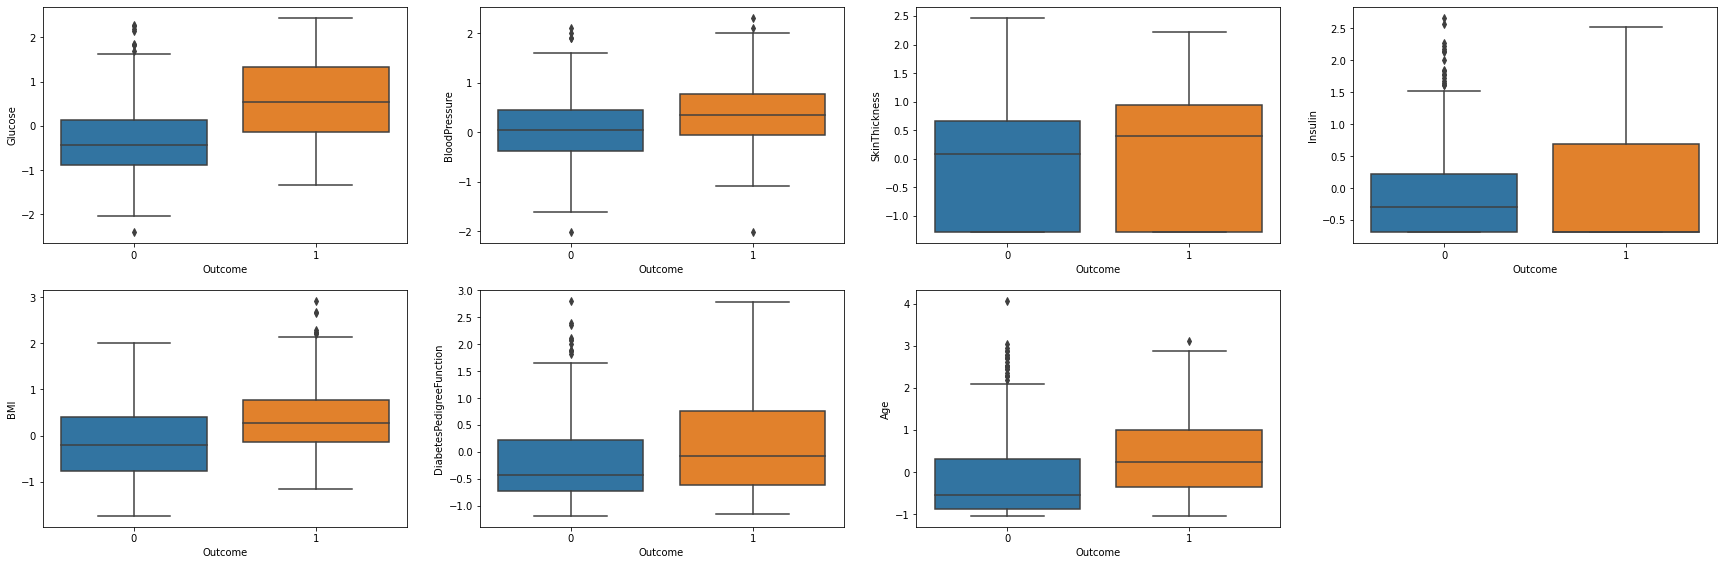

In [129]:
data_IQR = data_1
for i in range(0, len(names) - 2):
    qv1 = data[names[i]].quantile(0.2)
    qv2 = data[names[i]].quantile(0.8)
    between = qv2 - qv1
    data_IQR = data_IQR.loc[(data[names[i]] > (qv1 - 1.6 * between)) & (data[names[i]] < (qv2 + 1.6 * between))]

print(data_IQR.groupby(names[-1]).size())
Plot_box(data_IQR, names[:-1], 'Outcome')



In [130]:
data = data_IQR
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
5,-0.153085,0.252871,-1.287373,-0.692439,-0.810813,-0.817546,-0.275580,0


Данные несбалансированны, примеров с положительным результатом почти в два раза меньше, чем с отрицательным. Сгенерируем синтетические данные, чтобы убрать дисбаланс классов.

In [131]:
print(data.groupby(names[-1]).size())

Outcome
0    457
1    231
dtype: int64


In [132]:
model = sdv.tabular.GaussianCopula()
model.fit(data)


In [133]:
sample = model.sample(500)
sample.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.0,-0.0,2.0,2.0,-0.0,-1.0,-0.0,0
1,0.0,1.0,-1.0,-0.0,0.0,-0.0,1.0,1
2,-0.0,1.0,-0.0,-0.0,-0.0,1.0,1.0,1
3,0.0,1.0,-1.0,1.0,-0.0,-1.0,-1.0,1
4,2.0,0.0,-0.0,-0.0,-1.0,-1.0,-0.0,0


In [134]:
print(sdv.evaluation.evaluate(data, sample))

new_data = pd.concat([data, sample.loc[sample['Outcome'] == 1]])

print(new_data.groupby(names[-1]).size())

0.7186933139534883
Outcome
0    457
1    466
dtype: int64


In [135]:
data = new_data

### Дерево решений

In [136]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data[names[:-1]], data[names[-1]], test_size=0.3)

In [155]:
from collections import Counter

class Node:
    def __init__(self, ind_col, val_col, class_num, end = True):
        self.ind_col = ind_col
        self.val = val_col
        self.class_num = class_num
        self.end = end
        self.l = None
        self.r = None
    def Get_Class(self):
        return self.class_num


class Tree:
    def __init__(self, max_depth, col_indexes = [], min_node_len = 1):
        self.max_depth = max_depth
        self.col_indexes = col_indexes
        self.min_len = min_node_len
    
    def fit(self, data, labels):
        
        d =  data.to_numpy() if type(data) != np.ndarray else data
        l = labels.to_numpy() if type(labels) != np.ndarray else labels

        if len(self.col_indexes) == 0:
            self.col_indexes = np.arange(len(d[0]))

        # print(self.col_indexes)

        self.nodes = dict()
        ind = self.Build_Nodes(d, l, 0, 0, -1)
        
    def Get_Index_and_Val(self, data, labels):
        d_T = data.T
        lbl = labels

        rez_ind = -1
        rez_val = -1

        score = -1

        h_g_ind = self.Gini_index(lbl)
        for i in self.col_indexes:
            d = d_T[i]
            for el in d:
                l, r = self.Split_for_gini(d, lbl, el)
                l_g_ind = self.Gini_index(l)
                r_g_ind = self.Gini_index(r)

                gini_gain = h_g_ind - l_g_ind * len(l)/len(d) - r_g_ind * len(r)/len(d)

                if gini_gain > score:
                    score = gini_gain
                    rez_ind = i
                    rez_val = el
        return rez_ind, rez_val

    def Gini_index(self, labels):
        mc_lab = Counter(labels).most_common()
        rez = 0
        for (val, count) in mc_lab:
            rez += (count/len(labels))**2
        return 1 - rez

    def Split_for_gini(self, data, labels, val):
        l, r = [], []
        for i in range(len(data)):
            if (data[i] < val): l.append(labels[i])
            else: r.append(labels[i])
        return l, r

    def Split(self, data, labels, ind_col, val_col):
        l_data, l_labels, r_data, r_labels = [], [], [], []

        for i, d in enumerate(data):
            if d[ind_col] > val_col:
                r_data.append(d)
                r_labels.append(labels[i])
            else:
                l_data.append(d)
                l_labels.append(labels[i])
        
        return np.array(l_data), np.array(l_labels), np.array(r_data), np.array(r_labels)
    
    def Get_class(self, l_labels, r_labels):
        l_class, r_class = None, None

        l_vals = Counter(l_labels).most_common()
        r_vals = Counter(r_labels).most_common()

        if (l_vals[0][0] != r_vals[0][0]):
            l_class = l_vals[0][0]
            r_class = r_vals[0][0]
        elif l_vals[0][1] > r_vals[0][1]:
            l_class = l_vals[0][0]
            r_class = 1 - l_class
        else:
            r_class = r_vals[0][0]
            l_class = 1 - r_class
            

        return l_class, r_class

    def Build_Nodes(self, data, labels, num, depth, class_num):

        ind_col, val_col = self.Get_Index_and_Val(data, labels)

        # print('ind_col, val_col  - ', ind_col, val_col)

        l_data, l_labels, r_data, r_labels = self.Split(data, labels, ind_col, val_col)

        node_num = num
        node = Node(ind_col, val_col, class_num)
        self.nodes[node_num] = node

        # print('node_num: ', node_num)
        # print('len l:', len(l_labels))
        # print('len r:', len(r_labels))

        if len(l_labels) <= self.min_len or len(r_labels) <= self.min_len or depth >= self.max_depth:
            return node_num
        else:
            self.nodes[node_num].end = False
        
        l_class, r_class = self.Get_class(l_labels, r_labels)

        # left
        left_node_num = node_num + 1
        self.nodes[node_num].l = left_node_num

        temp_node_num = self.Build_Nodes(l_data, l_labels, left_node_num, depth + 1, l_class)

        # right
        right_node_num = temp_node_num + 1
        self.nodes[node_num].r = right_node_num

        temp_node_num = self.Build_Nodes(r_data, r_labels, right_node_num, depth + 1, r_class)

        return temp_node_num

    def predict(self, data):
        d = data.to_numpy()
        ans = []

        for str in d:
            a = self.Find(str, 0)
            ans.append(a)
        return ans

    def Find(self, str, ind):
        if self.nodes[ind].end == True:
            return self.nodes[ind].class_num
        elif str[self.nodes[ind].ind_col] < self.nodes[ind].val:
            return self.Find(str, self.nodes[ind].l)
        else:
            return self.Find(str, self.nodes[ind].r)

    def Print(self, ind):
        if self.nodes[ind].end == True:
            print(ind, 'end')
        else:
            print(ind, ' l: ', self.nodes[ind].l, ' r: ', self.nodes[ind].r)
            self.Print(self.nodes[ind].l)
            self.Print(self.nodes[ind].r)

tr = Tree(3)
tr.fit(data_train, label_train)

Accuracy: 0.6064981949458483
Precision: 0.34459459459459457
Recall: 0.8095238095238095
F-metric 0.48341232227488157


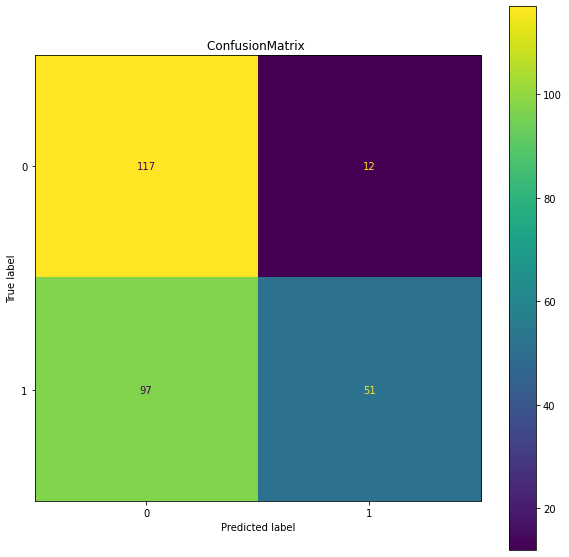

In [159]:
pr = tr.predict(data_test)
c_matr = metrics.confusion_matrix(label_test, pr) 
TP = c_matr[1][-1]
FP = c_matr[1][0]
TN = c_matr[0][0]
FN = c_matr[0][1]
accuracy = (pr == label_test).mean()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_metric = 2 * precision * recall / (precision + recall)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-metric", f_metric)
plot_ConfusionMatrix(label_test, pr)

### Случайный лес

In [160]:
import random
def Rand_split(k, data):
    rez = [data, data[0: len(data) // 2], data[len(data) - len(data) // 2:]]
    for i in range(k - 3):
        start = random.randint(0, len(data))
        end = start
        while end == start or min(end, start) >= max(end, start) + 2:
            end = random.randint(0, len(data))
        d = data
        np.random.shuffle(d)
        rez.append(d[min(start, end):max(start, end)])
    return rez
    
def Rand_params(k, count):
    par = np.arange(0, count)
    np.random.shuffle(par)
    return list(par[:k])
    
class RandomForest:
    def __init__(self, k, depth):
        self.k = k
        self.depth = depth
    
    def fit(self, data, label):
        data = data.to_numpy()
        d = np.append(data.T, [label], axis = 0).T 

        rnd_data = Rand_split(self.k, d)

        rnd_params = [list(np.arange(0, len(data[0]) - 1))]

        for i in range(self.k - 1):
            
            count = random.randint(1, len(data[0]) - 2)
            rnd_p = Rand_params(count, len(data[0]) - 1)
            while rnd_params.count(rnd_p) > 0:
                count = random.randint(1, len(data[0]) - 2)
                rnd_p = Rand_params(count, len(data[0]) - 1)
            rnd_params.append(rnd_p)
        # print(rnd_params)
        self.forest = []
        for i in range(self.k):
            tr = Tree(self.depth, rnd_params[i])
            data_for_tree = rnd_data[i].T[:-1].T
            labels_for_tree =  rnd_data[i].T[-1]
            # print("data:", len(rnd_data[i]))
            # print("data:", len(data_for_tree))
            # print("label:", len(labels_for_tree))
            tr.fit(data_for_tree, labels_for_tree)
            self.forest.append(tr)

    def predict(self, data):
        pr = []
        for i in range(self.k):
            p = self.forest[i].predict(data)
            pr.append(p)
        pr = np.array(pr).T
        rez = []
        for i in pr:
            rez.append(Counter(np.array(i)).most_common()[0][0])
        return rez


rf = RandomForest(50, 1000)
rf.fit(data_train, label_train)

Accuracy: 0.7075812274368231
Precision: 0.5608108108108109
Recall: 0.8383838383838383
F-metric 0.6720647773279352


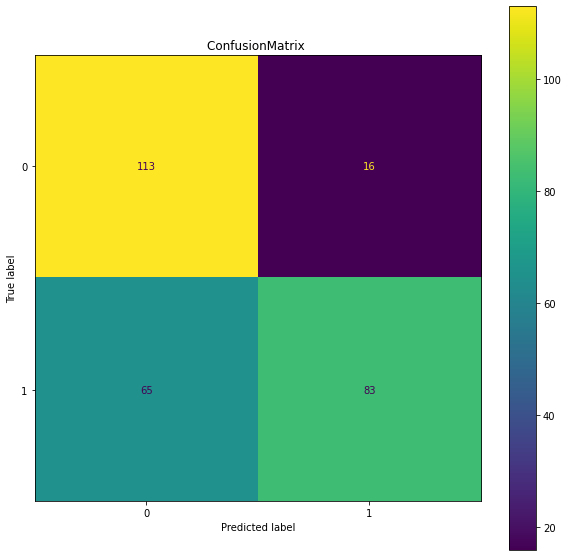

In [161]:
pr = rf.predict(data_test)

c_matr = metrics.confusion_matrix(label_test, pr) 
TP = c_matr[1][-1]
FP = c_matr[1][0]
TN = c_matr[0][0]
FN = c_matr[0][1]
accuracy = (pr == label_test).mean()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_metric = 2 * precision * recall / (precision + recall)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-metric", f_metric)
plot_ConfusionMatrix(label_test, pr)

Accuracy: 0.8158844765342961
Precision: 0.8108108108108109
Recall: 0.8391608391608392
F-metric 0.8247422680412371


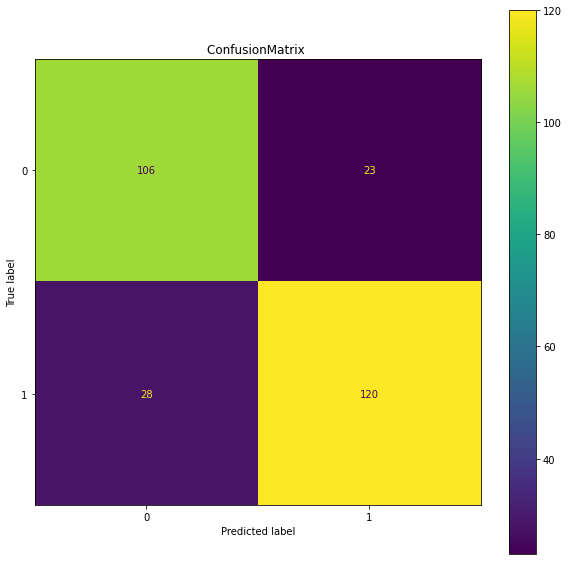

In [163]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier();
rnf.fit(data_train, label_train)
pr = rnf.predict(data_test)

c_matr = metrics.confusion_matrix(label_test, pr) 
TP = c_matr[1][-1]
FP = c_matr[1][0]
TN = c_matr[0][0]
FN = c_matr[0][1]
accuracy = (pr == label_test).mean()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_metric = 2 * precision * recall / (precision + recall)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-metric", f_metric)
plot_ConfusionMatrix(label_test, pr)

Анализируя результаты работы алгоритмов можно убедиться в том, что ансамбль из деревьев(Случайный лес) различает классы лучше, чем простое дерево решений. Дерево решений может сильно подстроиться под обучающие данные, что может привести к переобучению, поэтому при увеличении глубины дерева точность на обучающих данных будет расти, а на тестовых падать. Случайному лесу гораздо сложнее подстроиться под обучающие данные, если в нем достаточное количество деревьев(а не одно/два), даже с большой глубиной. 
Реализованный мной алгоритм случайного леса показал результат хуже, чем алгоритм из библиотеки sklearn. 
При анализе метрик(реализованного мной алгоритма) можно заметить, что метрика Precision достаточно мала. Следовательно, доля объектов, предсказанных положительно, действительно оказавшихся положительными мала. Для данного набора данных это плохо, так как необходимо предсказывать диабет, пропустить заболевание, когда оно есть, может быть опасно.

## Логистическая регрессия

In [ ]:
class LogisticRegression():
    def __init__(self, lr, epoch, batch_size):
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        self.data = x
        p = np.dot(self.W, self.data.T)
        return self.sigmoid(p.astype(np.float64))
    
    def update(self):
        self.W -= self.lr * self.dW
        
    def fit(self, data, labels):
        data =  data.to_numpy() if type(data) != np.ndarray else data
        labels = labels.to_numpy() if type(labels) != np.ndarray else labels
        self.W = np.random.normal(0.1, 1.0 / np.sqrt(len(data[0])), (len(data[0]), ))

        for _ in range(self.epoch):
            for i in range(0, len(data), self.batch_size):
                x = data[i:i + self.batch_size]
                y = labels[i:i + self.batch_size]
                
                y_hat = self.forward(x.astype(np.float64))

                self.dW = self.W + np.dot(y_hat - y, x)
                self.dW = self.dW.astype('float64')
                self.update()
        
    def predict(self, data):
        p = self.forward(data)
        return (p  > 0.5).astype('int64')

logRegr = LogisticRegression(lr = 0.01, epoch=80, batch_size=40)
logRegr.fit(data_train, label_train)

0.7239256883879115
Accuracy: 0.7220216606498195
Precision: 0.722972972972973
Recall: 0.7482517482517482
F-metric 0.7353951890034365


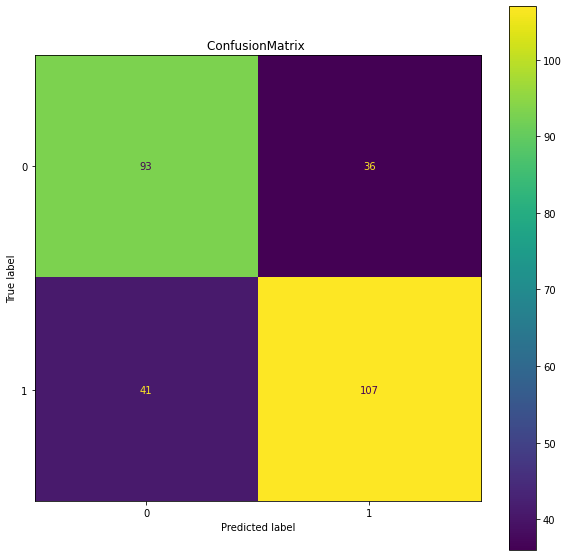

In [176]:
pr = logRegr.predict(data_test)

c_matr = metrics.confusion_matrix(label_test, pr) 
TP = c_matr[1][-1]
FP = c_matr[1][0]
TN = c_matr[0][0]
FN = c_matr[0][1]
accuracy = (pr == label_test).mean()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_metric = 2 * precision * recall / (precision + recall)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-metric", f_metric)
plot_ConfusionMatrix(label_test, pr)

Accuracy: 0.7184115523465704
Precision: 0.6824324324324325
Recall: 0.7651515151515151
F-metric 0.7214285714285714


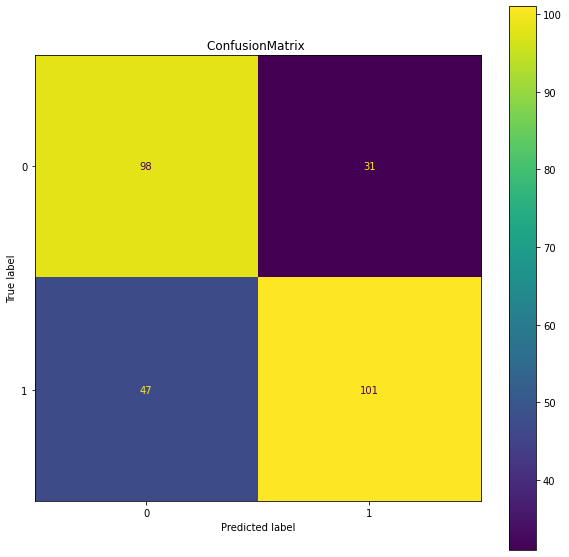

In [165]:
from sklearn.linear_model import LogisticRegression
lrgr = LogisticRegression();
lrgr.fit(data_train, label_train)
pr = lrgr.predict(data_test)

c_matr = metrics.confusion_matrix(label_test, pr) 
TP = c_matr[1][-1]
FP = c_matr[1][0]
TN = c_matr[0][0]
FN = c_matr[0][1]
accuracy = (pr == label_test).mean()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_metric = 2 * precision * recall / (precision + recall)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-metric", f_metric)
plot_ConfusionMatrix(label_test, pr)

Логистическая регрессия показала результаты лучше, чем случайный лес и дерево решений. При сравнении точности алгоритма, реализованного мной и из библиотеки sklearn, было замечено, что точность практически одинакова, различия наблюдаются только в метриках. Например у библиотечного метрика алгоритма Recall больше, чем у алгоритма, реализованного мной, а Precision меньше. 

----Регрессия

### Анализ и подготовка данных

In [3]:
file_path = "adm_data.csv"

data2 = pd.read_csv(file_path, parse_dates=True)

names2 = [col for col in data2.columns]
data2 = data2.drop(columns=[names2[0]])
names2 = names2[1:]
colors = sns.color_palette("hls", len(names2))

print(" len data2: {}".format(len(data2)))
print(" len data2_without_miss: {}".format(len(data2.dropna())))

print("Data2 shape: ", data2.shape)
data2.head()


 len data2: 400
 len data2_without_miss: 400
Data2 shape:  (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Матрица корреляций:

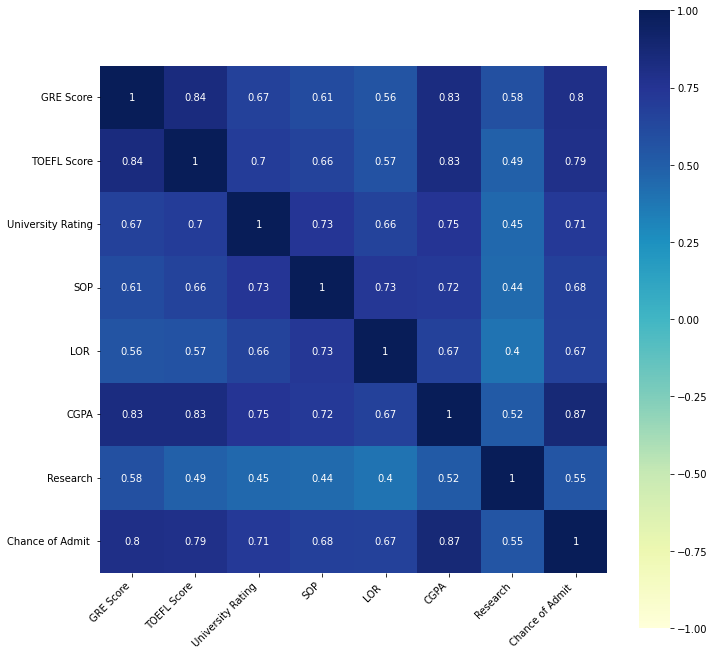

In [20]:
corr2 = data2.corr()
plt.figure(figsize=(25, 25))
x1 = plt.subplot(2, 2, 1)
x1 = sns.heatmap(corr2, annot = True, vmin=-1, cmap="YlGnBu", vmax=1, square=True)
x1.set_xticklabels(x1.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

In [22]:
print([col for col in data2.columns])

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


Можно увидеть, что данные CGPA и GRE Score сильно зависят друг от друга, а также от CGPA сильно зависят и другие данные, аналогично с GRE Score.
Такая же ситуация происходит с SOP и LOR
Удалим сильно зависящие данные, и посмотрим на матрицу корреляций


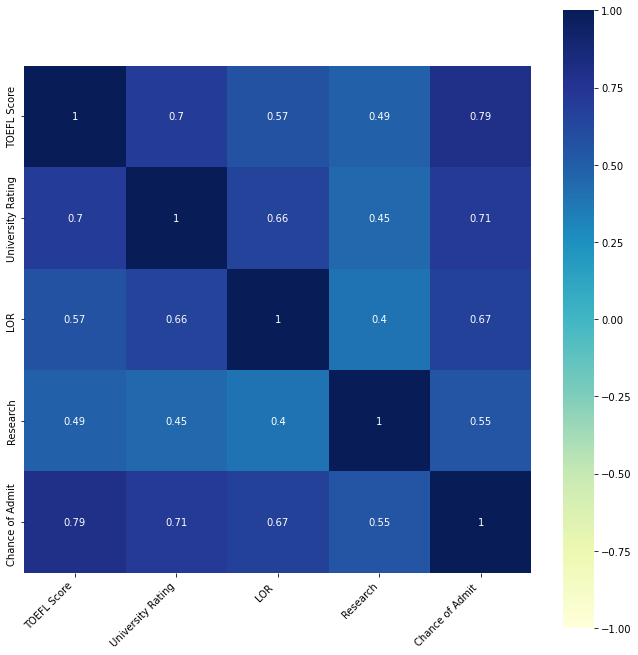

In [26]:
data3 = data2.drop(columns=['CGPA', 'GRE Score', 'SOP'])

corr3 = data3.corr()
plt.figure(figsize=(25, 25))
x1 = plt.subplot(2, 2, 1)
x1 = sns.heatmap(corr3, annot = True, vmin=-1, cmap="YlGnBu", vmax=1, square=True)
x1.set_xticklabels(x1.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

In [34]:
data2 = data3
names2 = [col for col in data2.columns]

Посмотрим на гистограмму данных

<AxesSubplot: ylabel='Frequency'>

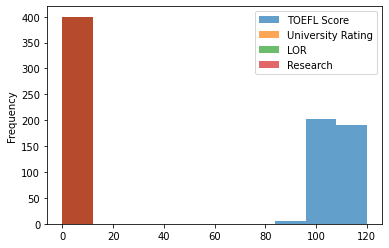

In [35]:
display(data2[names2[:-1]].plot.hist(alpha=0.7))

Нормализируем данные и посмотрим на результат

In [36]:
display(data2.describe())
normalized_data2 = (data2[names2[:-1]] - data2[names2[:-1]].mean())/data2[names2[:-1]].std()
normalized_data2[names2[-1]] = data2[names2[-1]]
normalized_data2[names2[-2]] = data2[names2[-2]]
display(normalized_data2.describe())

,TOEFL Score,University Rating,LOR,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,107.410000,3.087500,3.452500,0.547500,0.724350
std,6.069514,1.143728,0.898478,0.498362,0.142609
min,92.000000,1.000000,1.000000,0.000000,0.340000
25%,103.000000,2.000000,3.000000,0.000000,0.640000
50%,107.000000,3.000000,3.500000,1.000000,0.730000
75%,112.000000,4.000000,4.000000,1.000000,0.830000
max,120.000000,5.000000,5.000000,1.000000,0.970000


,TOEFL Score,University Rating,LOR,Research,Chance of Admit
count,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,5.506706e-16,7.105427e-17,-1.554312e-16,0.547500,0.724350
std,1.000000e+00,1.000000e+00,1.000000e+00,0.498362,0.142609
min,-2.538918e+00,-1.825172e+00,-2.729617e+00,0.000000,0.340000
25%,-7.265821e-01,-9.508379e-01,-5.036297e-01,0.000000,0.640000
50%,-6.755072e-02,-7.650420e-02,5.286721e-02,1.000000,0.730000
75%,7.562385e-01,7.978295e-01,6.093641e-01,1.000000,0.830000
max,2.074301e+00,1.672163e+00,1.722358e+00,1.000000,0.970000


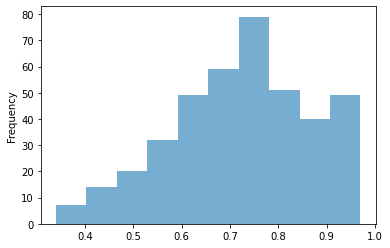

In [37]:
data_2 = normalized_data2
data_2[names2[-1]].plot.hist(alpha=0.6);

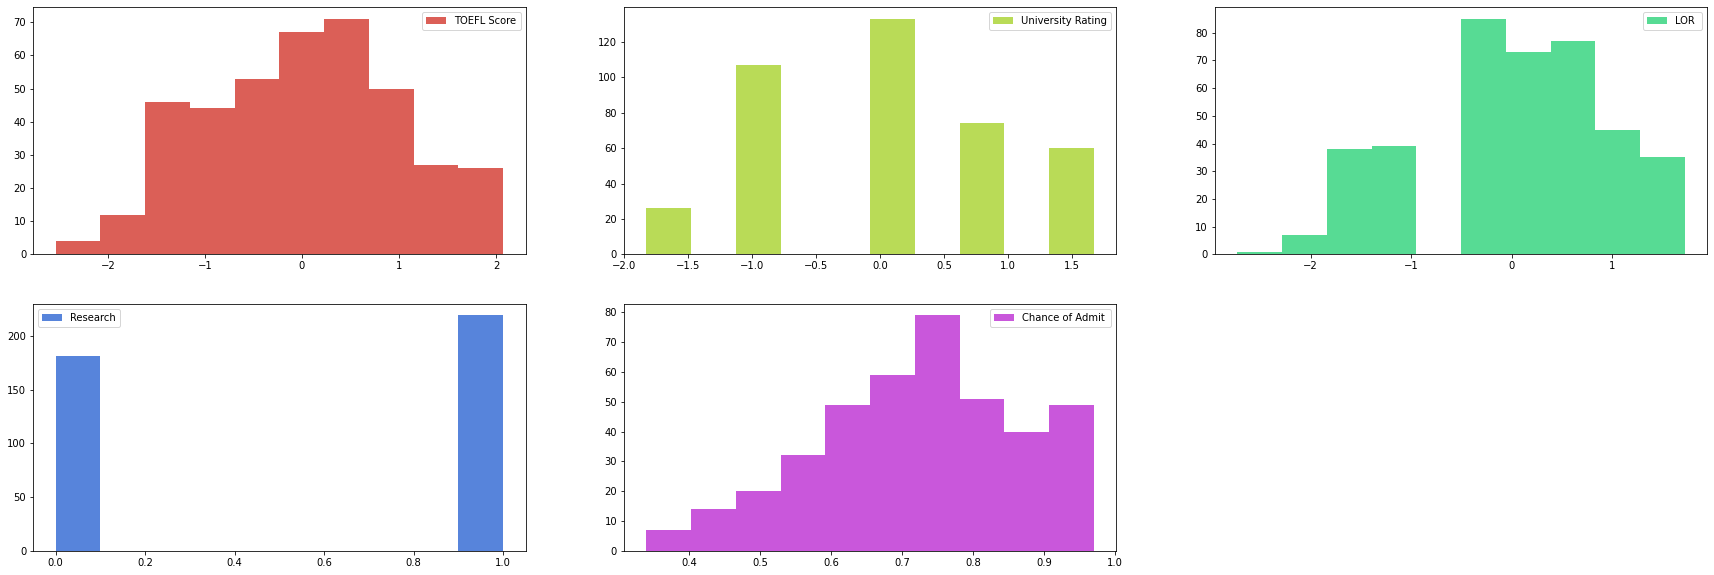

In [38]:
Plot_hist(data_2, names2)

### Дерево регрессии

In [42]:
from sklearn.model_selection import train_test_split
data_train2, data_test2, label_train2, label_test2 = train_test_split(data_2[names2[:-1]], data_2[names2[-1]], test_size=0.3)

In [52]:
from collections import Counter

class Node:
    def __init__(self, ind_col, val_col, rez_val, end = True):
        self.ind_col = ind_col
        self.val = val_col
        self.rez_val = rez_val
        self.end = end
        self.l = None
        self.r = None
    def Get_Class(self):
        return self.rez_val

class Regression_Tree:
    def __init__(self, max_depth, col_indexes = [], min_node_len = 1):
        self.max_depth = max_depth
        self.col_indexes = col_indexes
        self.min_len = min_node_len
    
    def fit(self, data, labels):
        
        d =  data.to_numpy() if type(data) != np.ndarray else data
        l = labels.to_numpy() if type(labels) != np.ndarray else labels

        if len(self.col_indexes) == 0:
            self.col_indexes = np.arange(len(d[0]))

        # print(self.col_indexes)

        self.nodes = dict()
        ind = self.Build_Nodes(d, l, 0, 0, -1)
        
    def Get_Index_and_Val(self, data, labels):
        d_T = data.T
        lbl = labels

        rez_ind = -1
        rez_val = -1


        score = self.RSS(lbl)
        self.score = score + 10
        for i in self.col_indexes:
            d = d_T[i]
            for el in d:
                l, r = self.Split_for_RSS(d, lbl, el)
                l_rss = self.RSS(l)
                r_rss = self.RSS(r)

                sum_rss = l_rss + r_rss

                if sum_rss < score:
                    score = sum_rss
                    rez_ind = i
                    rez_val = el
        return rez_ind, rez_val

    def RSS(self, labels):
        if len(labels) == 0:
            return self.score
        mean = np.array(labels).mean()
        return sum([(i - mean)**2 for i in labels])

    def Split_for_RSS(self, data, labels, val):
        l, r = [], []
        for i in range(len(data)):
            if (data[i] < val): l.append(labels[i])
            else: r.append(labels[i])
        return l, r

    def Split(self, data, labels, ind_col, val_col):
        l_data, l_labels, r_data, r_labels = [], [], [], []

        for i, d in enumerate(data):
            if d[ind_col] > val_col:
                r_data.append(d)
                r_labels.append(labels[i])
            else:
                l_data.append(d)
                l_labels.append(labels[i])
        
        return np.array(l_data), np.array(l_labels), np.array(r_data), np.array(r_labels)
    
    def Get_class(self, l_labels, r_labels):
        return l_labels.mean(), r_labels.mean()

    def Build_Nodes(self, data, labels, num, depth, rez_val):

        ind_col, val_col = self.Get_Index_and_Val(data, labels)

        # print('ind_col, val_col  - ', ind_col, val_col)

        l_data, l_labels, r_data, r_labels = self.Split(data, labels, ind_col, val_col)

        node_num = num
        node = Node(ind_col, val_col, rez_val)
        self.nodes[node_num] = node

        # print('node_num: ', node_num)
        # print('len l:', len(l_labels))
        # print('len r:', len(r_labels))

        if len(l_labels) <= self.min_len or len(r_labels) <= self.min_len or depth >= self.max_depth:
            return node_num
        else:
            self.nodes[node_num].end = False
        
        l_class, r_class = self.Get_class(l_labels, r_labels)

        # left
        left_node_num = node_num + 1
        self.nodes[node_num].l = left_node_num

        temp_node_num = self.Build_Nodes(l_data, l_labels, left_node_num, depth + 1, l_class)

        # right
        right_node_num = temp_node_num + 1
        self.nodes[node_num].r = right_node_num

        temp_node_num = self.Build_Nodes(r_data, r_labels, right_node_num, depth + 1, r_class)

        return temp_node_num

    def predict(self, data):
        d = data.to_numpy()
        ans = []

        for str in d:
            a = self.Find(str, 0)
            ans.append(a)
        return ans

    def Find(self, str, ind):
        if self.nodes[ind].end == True:
            return self.nodes[ind].rez_val
        elif str[self.nodes[ind].ind_col] < self.nodes[ind].val:
            return self.Find(str, self.nodes[ind].l)
        else:
            return self.Find(str, self.nodes[ind].r)

    def Print(self, ind):
        if self.nodes[ind].end == True:
            print(ind, 'end')
        else:
            print(ind, ' l: ', self.nodes[ind].l, ' r: ', self.nodes[ind].r)
            self.Print(self.nodes[ind].l)
            self.Print(self.nodes[ind].r)



In [68]:
r_tr = Regression_Tree(len(label_train2), min_node_len = 5)
r_tr.fit(data_train2, label_train2)

mse_loss: 1.462165191705304


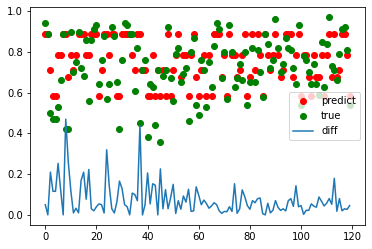

In [92]:
pr2 = r_tr.predict(data_test2)
mse_loss2 = sum((np.array(pr2) - np.array(label_test2))**2).mean()

print("mse_loss:", mse_loss2)

plt.plot(np.arange(0, len(pr2)), pr2, 'o', color = 'red', label = 'predict')
plt.plot(np.arange(0, len(label_test2)), label_test2, 'o', color = 'green', label = 'true')

plt.plot(np.arange(0, len(pr2)), abs(np.array(pr2) - np.array(label_test2)), label = 'diff')
plt.legend()

### Случайный (регрессионный) лес

In [76]:
import random
def Rand_split(k, data):
    rez = [data, data[0: len(data) // 2], data[len(data) - len(data) // 2:]]
    for i in range(k - 3):
        start = random.randint(0, len(data))
        end = start
        while end == start or min(end, start) >= max(end, start) + 2:
            end = random.randint(0, len(data))
        d = data
        np.random.shuffle(d)
        rez.append(d[min(start, end):max(start, end)])
    return rez
    
def Rand_params(k, count):
    par = np.arange(0, count)
    np.random.shuffle(par)
    return list(par[:k])
    
class RegrRandomForest:
    def __init__(self, k, depth):
        self.k = k
        self.depth = depth
    
    def fit(self, data, label):
        data = data.to_numpy()
        d = np.append(data.T, [label], axis = 0).T 

        rnd_data = Rand_split(self.k, d)

        rnd_params = [list(np.arange(0, len(data[0]) - 1))]

        for i in range(self.k - 1):
            
            count = random.randint(1, len(data[0]) - 2)
            rnd_p = Rand_params(count, len(data[0]) - 1)
            while rnd_params.count(rnd_p) > 0:
                count = random.randint(1, len(data[0]) - 2)
                rnd_p = Rand_params(count, len(data[0]) - 1)
            rnd_params.append(rnd_p)
        # print(rnd_params)
        self.forest = []
        for i in range(self.k):
            tr = Regression_Tree(self.depth, rnd_params[i], min_node_len=2)
            data_for_tree = rnd_data[i].T[:-1].T
            labels_for_tree =  rnd_data[i].T[-1]
            # print("data:", len(rnd_data[i]))
            # print("data:", len(data_for_tree))
            # print("label:", len(labels_for_tree))
            tr.fit(data_for_tree, labels_for_tree)
            self.forest.append(tr)

    def predict(self, data):
        pr = []
        for i in range(self.k):
            p = self.forest[i].predict(data)
            pr.append(p)
        pr = np.array(pr).T
        rez = []
        for i in pr:
            rez.append(np.array(i).mean())
        return rez




In [85]:
rf = RegrRandomForest(10, len(label_train2))
rf.fit(data_train2, label_train2)

mse_loss: 1.0043264177453324


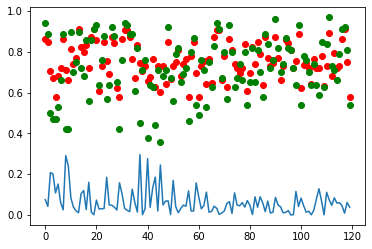

In [95]:
pr2 = rf.predict(data_test2)
mse_loss2 = sum((np.array(pr2) - np.array(label_test2))**2).mean()

print("mse_loss:", mse_loss2)

plt.plot(np.arange(0, len(pr2)), pr2, 'o', color = 'red', label = 'predict')
plt.plot(np.arange(0, len(label_test2)), label_test2, 'o', color = 'green', label = 'true')

plt.plot(np.arange(0, len(pr2)), abs(np.array(pr2) - np.array(label_test2)), label = 'diff')

mse_loss: 0.8689104876181474


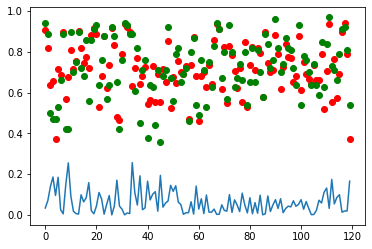

In [96]:
from sklearn.ensemble import RandomForestRegressor
rnf2 = RandomForestRegressor()
rnf2.fit(data_train2, label_train2)
pr2 = rnf2.predict(data_test2)

mse_loss = sum((np.array(pr2) - np.array(label_test2))**2).mean()

print("mse_loss:", mse_loss)

plt.plot(np.arange(0, len(pr2)), pr2, 'o', color = 'red', label = 'predict')
plt.plot(np.arange(0, len(label_test2)), label_test2, 'o', color = 'green', label = 'true')

plt.plot(np.arange(0, len(pr2)), abs(np.array(pr2) - np.array(label_test2)), label = 'diff')

Анализируя результаты работы алгоритмов можно убедиться в том, что ансамбль из регрессионных деревьев(Случайный лес) различает данные лучше, чем простое дерево регрессии. Это происходит потому, что Случайный регрессионный лес усредняет больше различных значений, которые в каждом его дереве, которое строилось не на всех данных, могут превосходить по точности данне из одного обычного регрессионного дерева.




Вывод: В данной лабораторной работе были реализованны следующие алгоритмы: Дерево решений, Случайный лес, Логистическая регрессия, Дерево регрессии и Случайный лес регрессий. А также использованы библиотечные алгоритмы из sklearn. Был проведен анализ данных и сгенерированы синтетические данные для балансировки классов. 